In [1]:
import os
import pandas as pd
import re
i = 0
filepaths = []
# "C:/Users/janja/Desktop/firstData"
for root, dirs, files in os.walk("C:/Users/janja/OneDrive/Pulpit/DaneMGR", topdown=True):
    for name in dirs:
        if (bool(re.findall('\d$', name)) == False):
            Path = (root + '/' + name)
            filepaths.append(re.sub('DaneMGR\\\\', 'DaneMGR/', Path))

In [2]:
from os import walk
filenameList = []
fullPath = []
for Path in filepaths:
    for (dirpath, dirnames, filenames) in walk(Path):
        #print(filenames)
        for name in filenames:
            if (bool(re.findall('fast_Unknown', name)) == True) and name not in filenameList:
                NewName = re.sub('._CsvLog', 'CsvLog', name)
                filenameList.append(NewName)
                fullPath.append(Path + '/' + NewName)

In [3]:
'''
print(filepaths)
print('\n')
print(filenameList)
print('\n')
print(fullPath)
'''

"\nprint(filepaths)\nprint('\n')\nprint(filenameList)\nprint('\n')\nprint(fullPath)\n"

In [4]:
'''
df = pd.DataFrame()
i = 0
for path in fullPath:
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8')
    print(df_local)
    match = re.findall("/B/Csv",path)
    boolean = bool(match)
    print(boolean)
    if boolean == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    # print(df_local)
    i += 1
    print(i)
    df = df.append(df_local)
'''



'\ndf = pd.DataFrame()\ni = 0\nfor path in fullPath:\n    df_local = pd.read_csv(path, sep = \',\', encoding = \'UTF-8\')\n    print(df_local)\n    match = re.findall("/B/Csv",path)\n    boolean = bool(match)\n    print(boolean)\n    if boolean == True:\n        df_local[\'position\'] = 1\n    else:\n        df_local[\'position\'] = 0\n    # print(df_local)\n    i += 1\n    print(i)\n    df = df.append(df_local)\n'

In [5]:
#T = 200 # describes which rows multiplied by n should be taken into the dataset
fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
df = pd.DataFrame()
for path in fullPath:
    print(path)
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8', usecols=fields)
    #df_local = df_local[df_local.index % T == 0] #Set to 2000 as 1 second is 20 observations
    match = re.findall("/B/Csv",path)
    if bool(match) == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    neo = re.findall('\/([\d]{1,2})\/', path)
    df_local.insert(0,'neonate', str(neo))
    print(df_local)
    df = df.append(df_local)

C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/B/CsvLogBase_2022-01-15_191202.371_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['1']                                 -0.155   
1         ['1']                                    NaN   
2         ['1']                                    NaN   
3         ['1']                                    NaN   
4         ['1']                                 -0.069   
...         ...                                    ...   
2986429   ['1']                                    NaN   
2986430   ['1']                                    NaN   
2986431   ['1']                                    NaN   
2986432   ['1']                                    NaN   
2986433   ['1']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -45.0         1  
1                                      NaN         1  
2                                    -60.0   

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['12']                                  0.290   
1        ['12']                                    NaN   
2        ['12']                                    NaN   
3        ['12']                                    NaN   
4        ['12']                                  0.281   
...         ...                                    ...   
2267197  ['12']                                    NaN   
2267198  ['12']                                    NaN   
2267199  ['12']                                    NaN   
2267200  ['12']                                    NaN   
2267201  ['12']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     66.0         1  
1                                      NaN         1  
2                                     77.0         1  
3                                      NaN         1  
4                           

C:/Users/janja/OneDrive/Pulpit/DaneMGR/15/B/CsvLogBase_2022-04-07_191904.132_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['15']                                 -0.286   
1        ['15']                                    NaN   
2        ['15']                                    NaN   
3        ['15']                                    NaN   
4        ['15']                                 -0.313   
...         ...                                    ...   
2211091  ['15']                                    NaN   
2211092  ['15']                                    NaN   
2211093  ['15']                                    NaN   
2211094  ['15']                                    NaN   
2211095  ['15']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    181.0         1  
1                                      NaN         1  
2                                    190.0  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/18/B/CsvLogBase_2022-05-05_171713.844_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['18']                                 -0.930   
1        ['18']                                    NaN   
2        ['18']                                    NaN   
3        ['18']                                    NaN   
4        ['18']                                 -0.759   
...         ...                                    ...   
3071926  ['18']                                    NaN   
3071927  ['18']                                    NaN   
3071928  ['18']                                    NaN   
3071929  ['18']                                    NaN   
3071930  ['18']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -41.0         1  
1                                      NaN         1  
2                                    -39.0  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/20/B/CsvLogBase_2022-05-30_154146.336_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['20']                                  0.228   
1        ['20']                                    NaN   
2        ['20']                                    NaN   
3        ['20']                                    NaN   
4        ['20']                                  0.301   
...         ...                                    ...   
1797476  ['20']                                    NaN   
1797477  ['20']                                 -1.837   
1797478  ['20']                                    NaN   
1797479  ['20']                                    NaN   
1797480  ['20']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     32.0         1  
1                                      NaN         1  
2                                     30.0  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/23/B/CsvLogBase_2022-11-21_220743.358_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['23']                                    NaN   
1        ['23']                                    NaN   
2        ['23']                                    NaN   
3        ['23']                                    NaN   
4        ['23']                                    NaN   
...         ...                                    ...   
3040932  ['23']                                    NaN   
3040933  ['23']                                  0.177   
3040934  ['23']                                    NaN   
3040935  ['23']                                    NaN   
3040936  ['23']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                      NaN         1  
1                                      NaN         1  
2                                      NaN  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/26/B/CsvLogBase_2022-06-14_130618.012_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['26']                                  0.155   
1        ['26']                                    NaN   
2        ['26']                                    NaN   
3        ['26']                                    NaN   
4        ['26']                                  0.104   
...         ...                                    ...   
2122865  ['26']                                    NaN   
2122866  ['26']                                 -0.157   
2122867  ['26']                                    NaN   
2122868  ['26']                                    NaN   
2122869  ['26']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -56.0         1  
1                                      NaN         1  
2                                    -63.0  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/29/B/CsvLogBase_2022-06-26_005021.547_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['29']                                  0.423   
1        ['29']                                    NaN   
2        ['29']                                    NaN   
3        ['29']                                    NaN   
4        ['29']                                  0.211   
...         ...                                    ...   
2886854  ['29']                                    NaN   
2886855  ['29']                                    NaN   
2886856  ['29']                                    NaN   
2886857  ['29']                                    NaN   
2886858  ['29']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                      7.0         1  
1                                      NaN         1  
2                                     31.0  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/31/B/CsvLogBase_2022-11-18_172548.093_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['31']                                  0.085   
1        ['31']                                    NaN   
2        ['31']                                    NaN   
3        ['31']                                    NaN   
4        ['31']                                  0.092   
...         ...                                    ...   
3065334  ['31']                                    NaN   
3065335  ['31']                                  0.704   
3065336  ['31']                                    NaN   
3065337  ['31']                                    NaN   
3065338  ['31']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     14.0         1  
1                                      NaN         1  
2                                     19.0  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/34/B/CsvLogBase_2022-07-11_193122.803_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['34']                                 -0.023   
1        ['34']                                    NaN   
2        ['34']                                    NaN   
3        ['34']                                    NaN   
4        ['34']                                 -0.028   
...         ...                                    ...   
2886088  ['34']                                    NaN   
2886089  ['34']                                 -0.409   
2886090  ['34']                                    NaN   
2886091  ['34']                                    NaN   
2886092  ['34']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    130.0         1  
1                                      NaN         1  
2                                    119.0  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/37/B/CsvLogBase_2022-08-01_223106.879_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['37']                                 -0.681   
1        ['37']                                    NaN   
2        ['37']                                    NaN   
3        ['37']                                    NaN   
4        ['37']                                 -0.662   
...         ...                                    ...   
2885392  ['37']                                    NaN   
2885393  ['37']                                  0.605   
2885394  ['37']                                    NaN   
2885395  ['37']                                    NaN   
2885396  ['37']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   -406.0         1  
1                                      NaN         1  
2                                   -410.0  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/4/B/CsvLogBase_2022-11-19_225923.810_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['4']                                  0.983   
1         ['4']                                    NaN   
2         ['4']                                    NaN   
3         ['4']                                    NaN   
4         ['4']                                  1.043   
...         ...                                    ...   
3064605   ['4']                                    NaN   
3064606   ['4']                                 -0.347   
3064607   ['4']                                    NaN   
3064608   ['4']                                    NaN   
3064609   ['4']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     24.0         1  
1                                      NaN         1  
2                                     26.0   

C:/Users/janja/OneDrive/Pulpit/DaneMGR/42/B/CsvLogBase_2022-10-13_220905.228_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['42']                                  0.051   
1        ['42']                                    NaN   
2        ['42']                                    NaN   
3        ['42']                                    NaN   
4        ['42']                                  0.054   
...         ...                                    ...   
2894422  ['42']                                    NaN   
2894423  ['42']                                  0.022   
2894424  ['42']                                    NaN   
2894425  ['42']                                    NaN   
2894426  ['42']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   -309.0         1  
1                                      NaN         1  
2                                   -329.0  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/45/B/CsvLogBase_2022-11-02_001717.105_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['45']                                 -0.062   
1        ['45']                                    NaN   
2        ['45']                                    NaN   
3        ['45']                                    NaN   
4        ['45']                                 -0.077   
...         ...                                    ...   
3084016  ['45']                                    NaN   
3084017  ['45']                                  0.108   
3084018  ['45']                                    NaN   
3084019  ['45']                                    NaN   
3084020  ['45']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   3247.0         1  
1                                      NaN         1  
2                                   3214.0  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/49/B/CsvLogBase_2022-12-07_210322.788_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['49']                                 -0.580   
1        ['49']                                    NaN   
2        ['49']                                    NaN   
3        ['49']                                    NaN   
4        ['49']                                 -0.647   
...         ...                                    ...   
2593132  ['49']                                    NaN   
2593133  ['49']                                 -0.495   
2593134  ['49']                                    NaN   
2593135  ['49']                                    NaN   
2593136  ['49']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    518.0         1  
1                                      NaN         1  
2                                    536.0  

C:/Users/janja/OneDrive/Pulpit/DaneMGR/6/B/CsvLogBase_2022-02-05_190838.197_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['6']                                 -0.349   
1         ['6']                                    NaN   
2         ['6']                                    NaN   
3         ['6']                                    NaN   
4         ['6']                                 -0.385   
...         ...                                    ...   
1934559   ['6']                                    NaN   
1934560   ['6']                                 -0.124   
1934561   ['6']                                    NaN   
1934562   ['6']                                    NaN   
1934563   ['6']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    178.0         1  
1                                      NaN         1  
2                                    192.0   

C:/Users/janja/OneDrive/Pulpit/DaneMGR/9/B/CsvLogBase_2022-03-21_201003.975_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['9']                                  1.299   
1         ['9']                                    NaN   
2         ['9']                                    NaN   
3         ['9']                                    NaN   
4         ['9']                                  1.546   
...         ...                                    ...   
1935557   ['9']                                    NaN   
1935558   ['9']                                  0.064   
1935559   ['9']                                    NaN   
1935560   ['9']                                    NaN   
1935561   ['9']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    146.0         1  
1                                      NaN         1  
2                                    139.0   

In [6]:
#df

In [7]:
#df_Repaired = df.rename({'Infinity|ECG.ECG_LEAD_I [MICROVOLT]': 'ECG.ECG_LEAD_I[MICROVOLT]', 'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)#.dropna()
#FinalData = df_Repaired[['ECG.ECG_LEAD_I[MICROVOLT]', 'RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]']].copy()
#State = df_Repaired[['position']].copy()
df_Repaired = df.rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
FinalData = df_Repaired[['neonate','RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]','position']].dropna().copy()
State = FinalData[['position']].copy()
Neonate = FinalData[['neonate']].copy()
FinalData.drop('position', axis=1, inplace=True)
FinalData.drop('neonate', axis=1, inplace=True)

In [8]:
#FinalData

In [9]:
#FinalData.describe()

In [10]:
#FinalData.groupby('neonate')['RESP.ONLY_ONE_IN_GROUP[OHM]'].describe()

In [11]:
#FinalData.groupby('neonate')['SPO2.SPO2_PULSE[COUNTS]'].describe()

In [12]:
#State

In [13]:
#State.describe()

In [14]:
#Neonate

In [15]:
#import pandas as pd
#'C:/Users/janja/Desktop/DaneMGR/21/B', 'C:/Users/janja/Desktop/DaneMGR/21/R'
#fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
#df_local = pd.read_csv('C:/Users/janja/Desktop/DaneMGR/21/B/CsvLogBase_2022-06-08_124008.050_fast_Unknown.csv', sep = ',', encoding = 'UTF-8', usecols=fields)

In [16]:
#df_local

In [17]:
#!pip install sweetviz

                                             |                                             | [  0%]   00:00 ->…


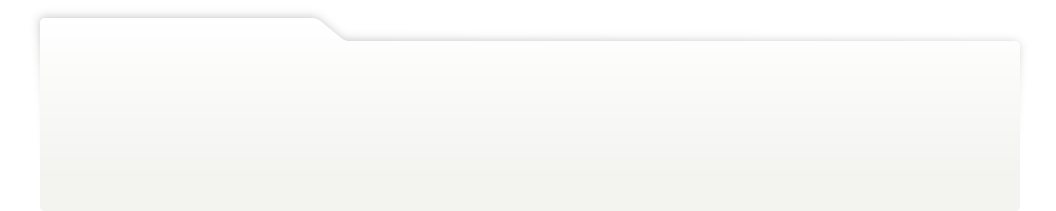
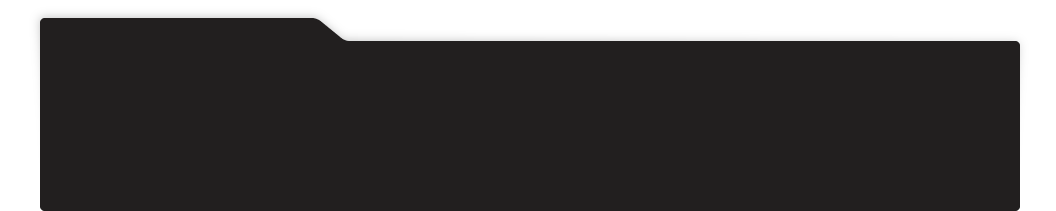
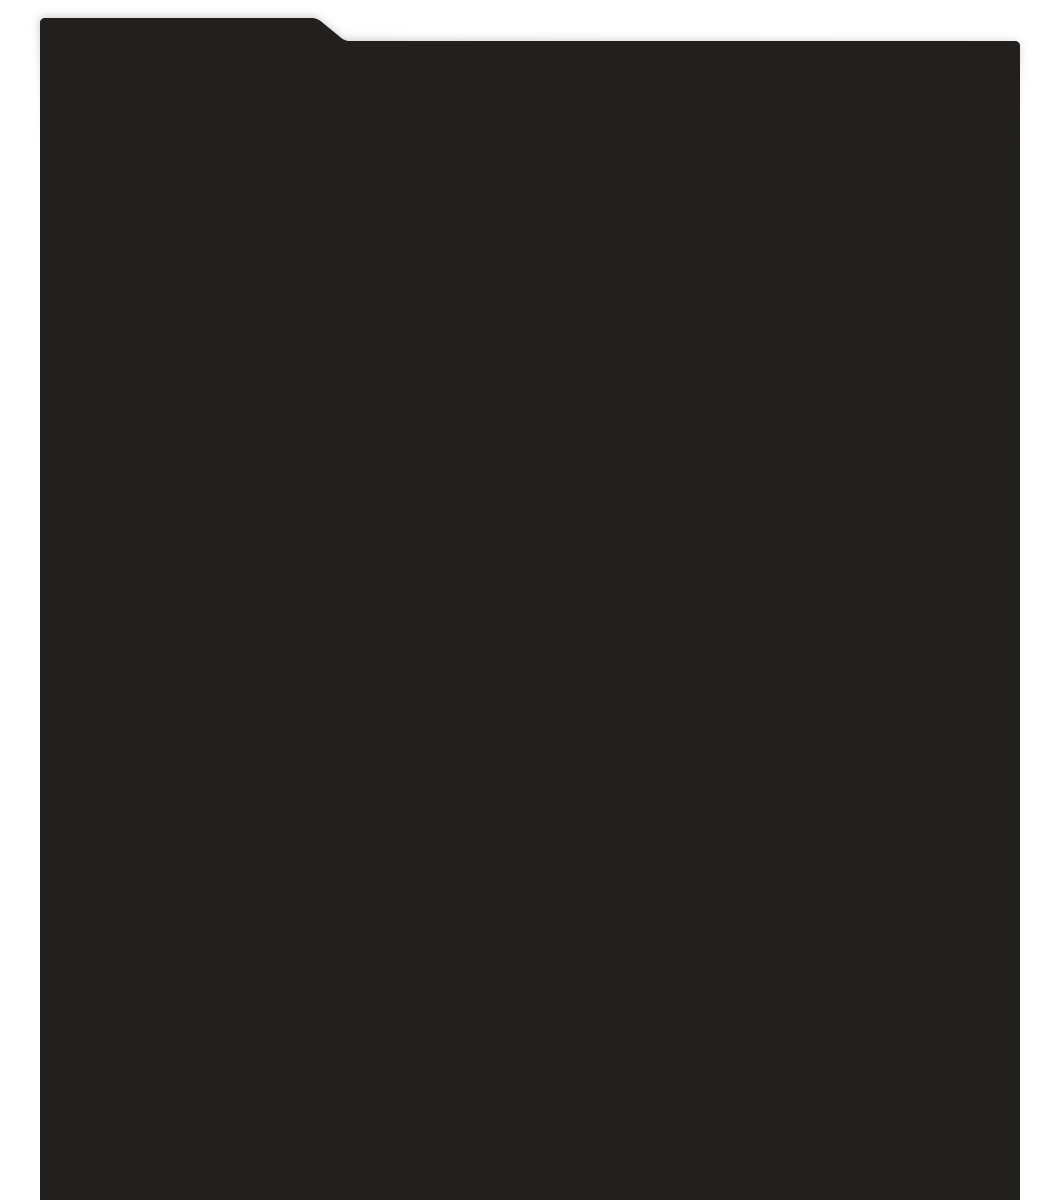
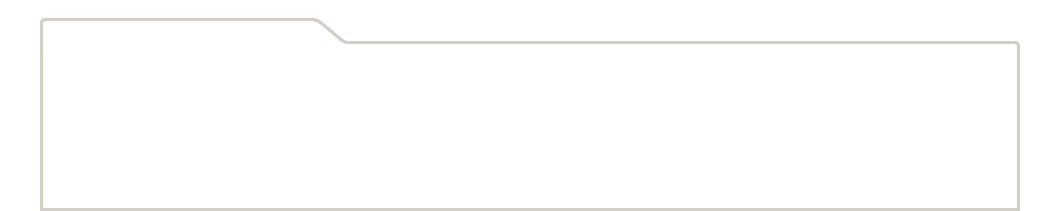
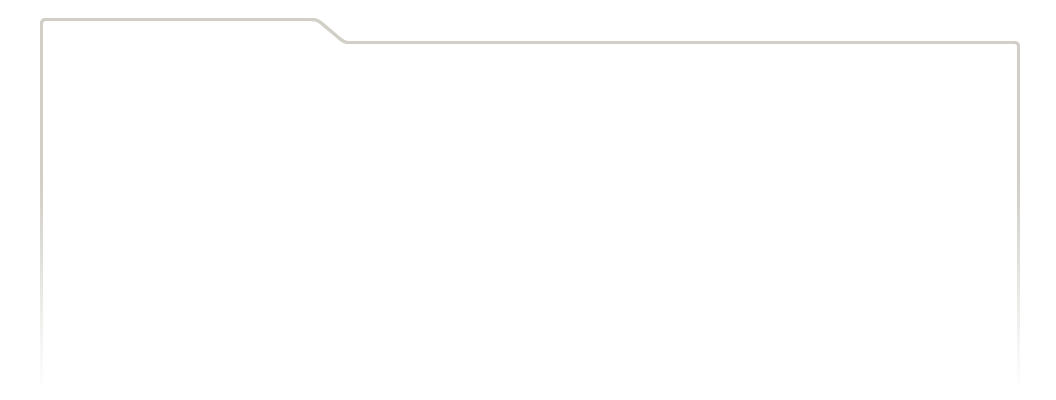
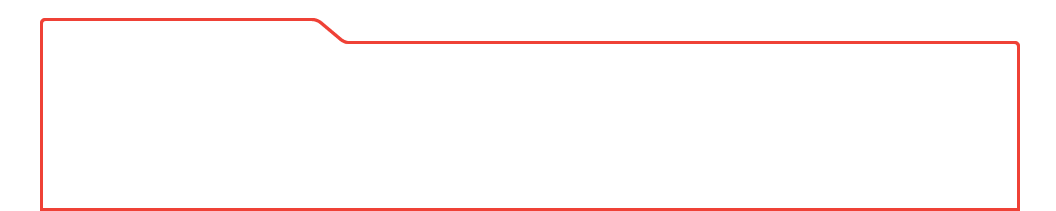
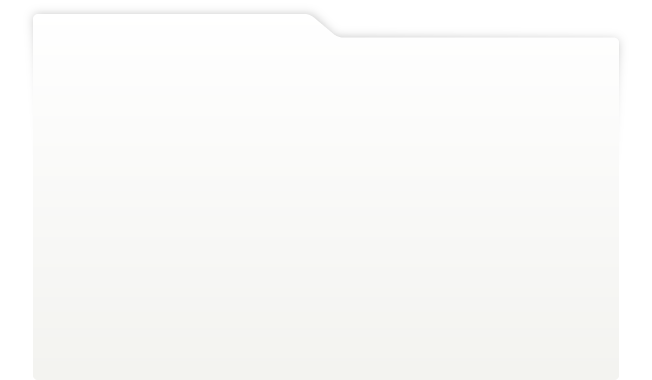
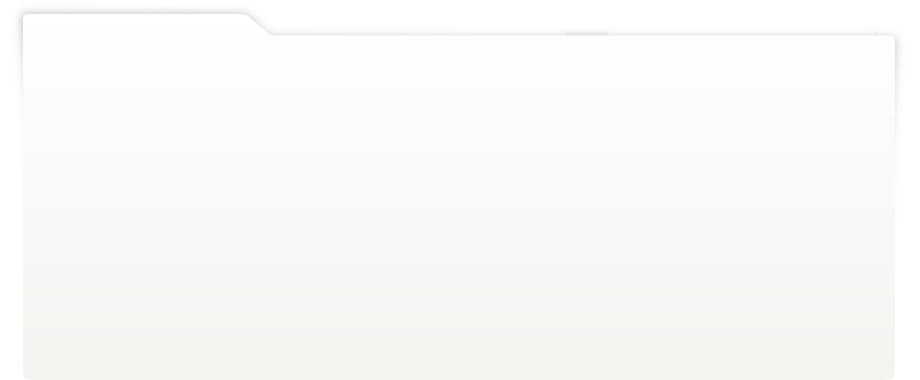
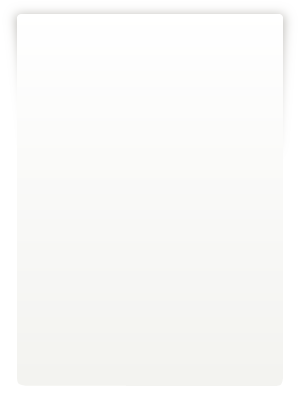
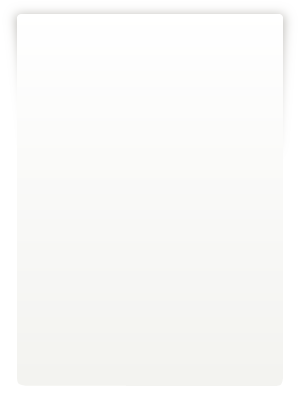
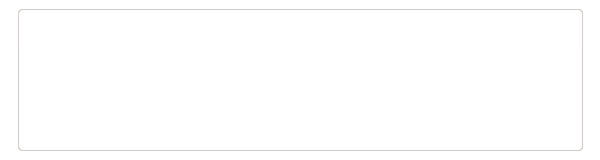
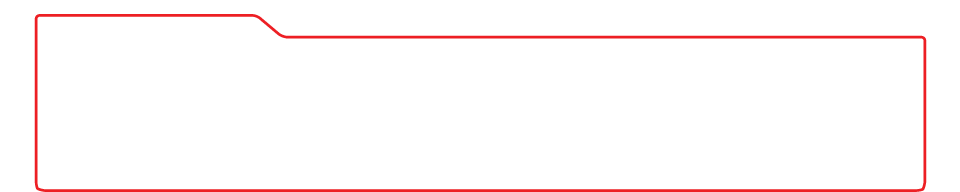
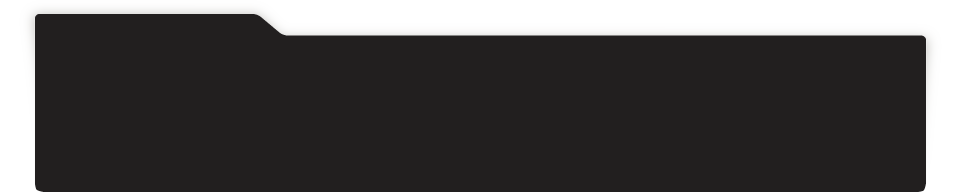
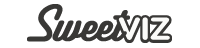
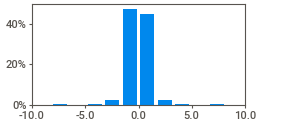
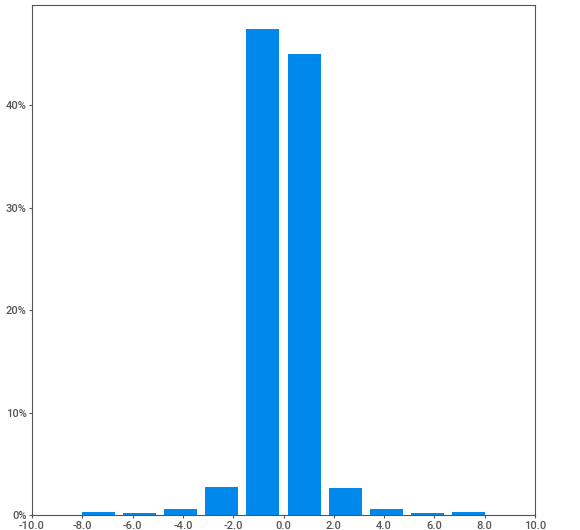
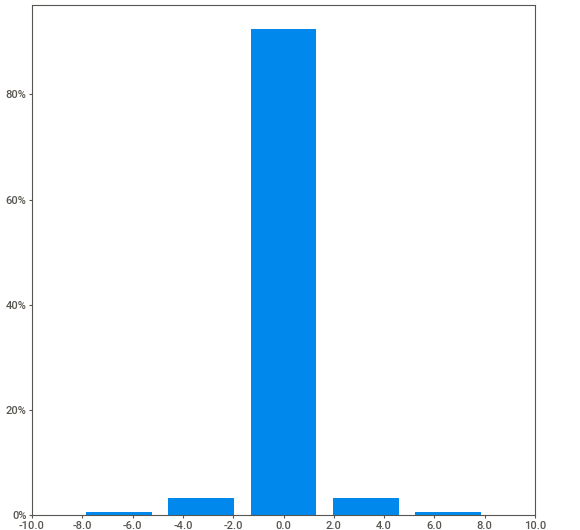
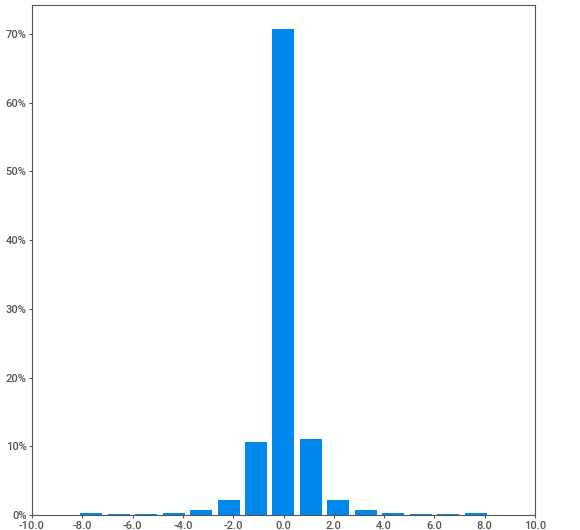
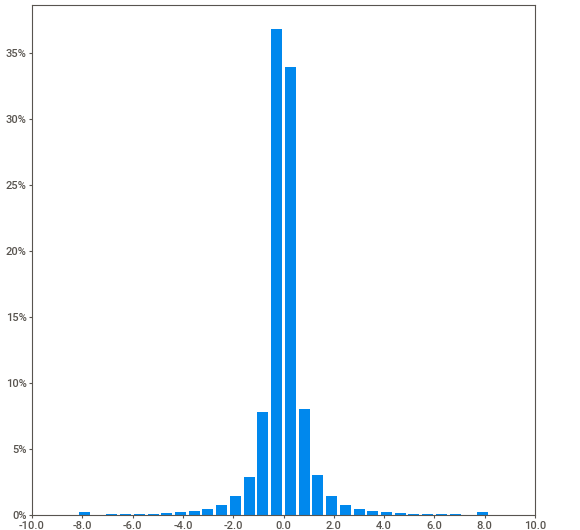
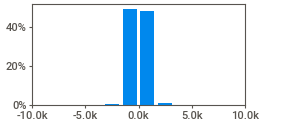
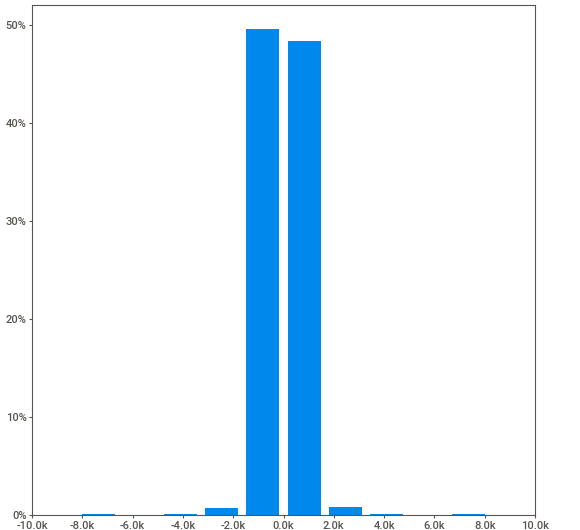
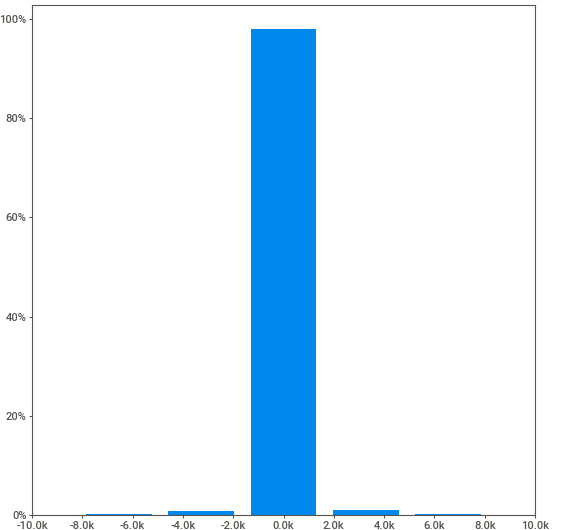
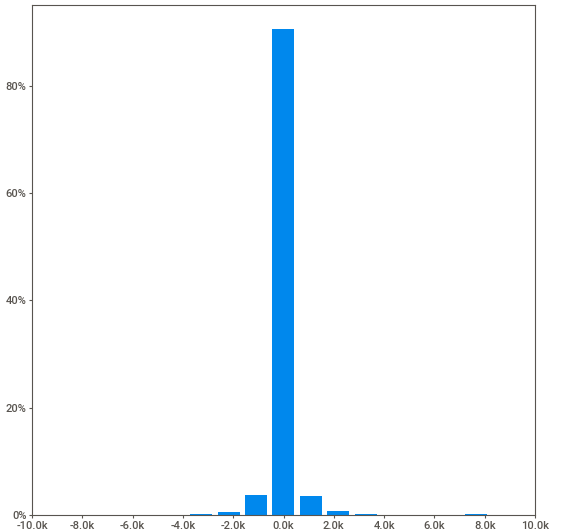
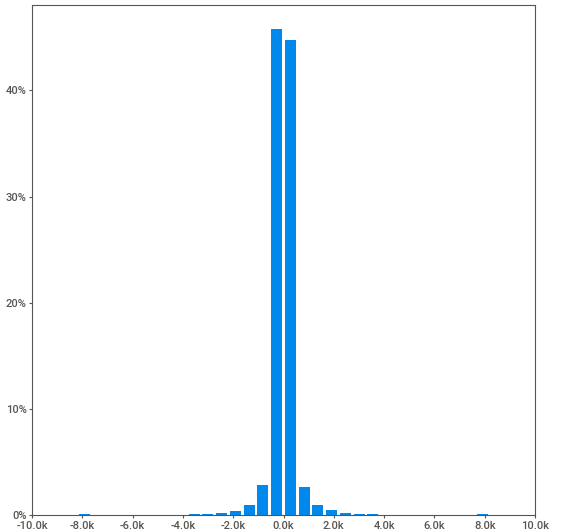
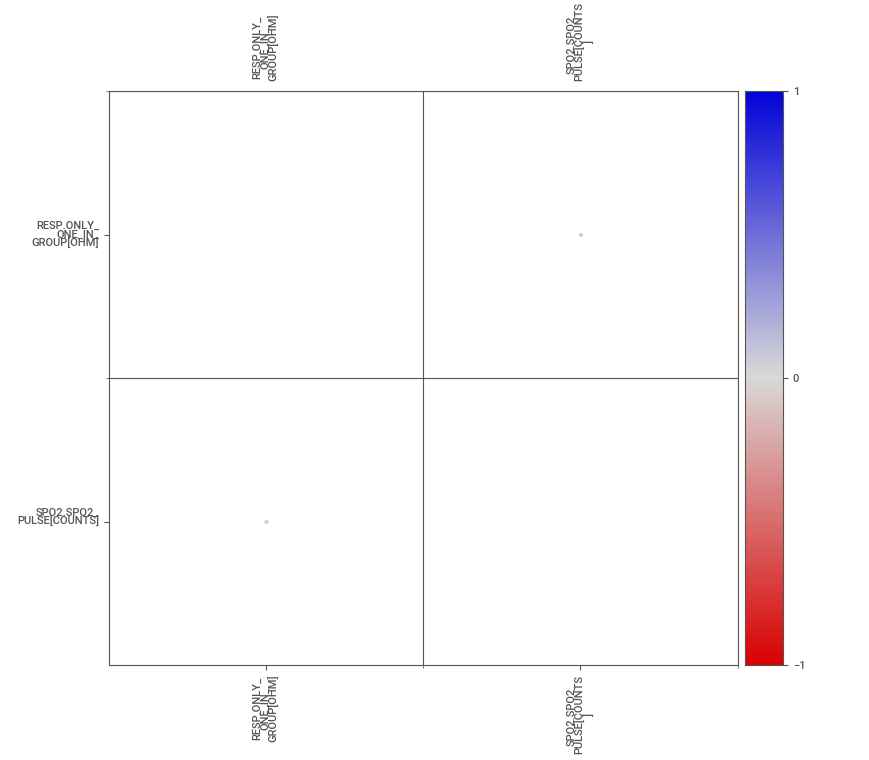
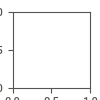

In [18]:
import sweetviz as sv
orig_data_report = sv.analyze(FinalData, pairwise_analysis = 'on')
orig_data_report.show_notebook()

Data segmentation

In [19]:
import math
import numpy as np
np_data = FinalData.to_numpy()
labels = State.to_numpy()
labels.astype('int')
nb_timestamps, nb_sensors = np_data.shape
window_size = 60 # Size of the data segments
timestamp_idx = 0 # Index along the timestamp dimension
segment_idx = 0 # Index for the segment dimension


nb_segments = int(math.floor(nb_timestamps/window_size))
print('Starting segmentation with a window size of %d resulting in %d segments ...' % (window_size,nb_segments))
data_to_save = np.zeros((nb_segments,window_size,nb_sensors),dtype=np.float32)
labels_to_save = np.zeros(nb_segments,dtype=int)

while segment_idx < nb_segments:
    data_to_save[segment_idx] = np_data[timestamp_idx:timestamp_idx+window_size,:]
    # Check the majority label ocurring in the considered window
    current_labels = labels[timestamp_idx:timestamp_idx+window_size]
    values, counts = np.unique(current_labels, return_counts=True)
    labels_to_save[segment_idx] = values[np.argmax(counts)]
    timestamp_idx += window_size
    segment_idx += 1

Starting segmentation with a window size of 60 resulting in 970999 segments ...


In [20]:
data_to_save.shape[0]

970999

In [21]:
labels_to_save.shape

(970999,)

In [22]:
#old
'''
F = 200 # Data frequency of 200HZ
labels = []
def extract_features(data_to_save, chunk_size):
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 6
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    for i in range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        max_val = np.max(chunk, axis=(0, 1))
        #arg_max = np.argmax(chunk, axis=(0, 1))
        sum_val = np.sum(chunk, axis=(0, 1))/F
        features[i,:] = np.hstack([mean, median, std, min_val, max_val, sum_val]).reshape(1, num_features*num_sensors)
        labels[i] = labels_to_save[i]
    #features = features.reshape(num_chunks, num_features, num_sensors)
    return features
'''

'\nF = 200 # Data frequency of 200HZ\nlabels = []\ndef extract_features(data_to_save, chunk_size):\n    num_chunks = data_to_save.shape[0]//chunk_size\n    num_features = 6\n    num_sensors = data_to_save.shape[2]\n    features = np.zeros((num_chunks, num_features*num_sensors))\n    for i in range(num_chunks):\n        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]\n        mean = np.mean(chunk, axis=(0, 1))\n        median = np.median(chunk, axis=(0, 1))\n        std = np.std(chunk, axis=(0, 1))\n        min_val = np.min(chunk, axis=(0, 1))\n        max_val = np.max(chunk, axis=(0, 1))\n        #arg_max = np.argmax(chunk, axis=(0, 1))\n        sum_val = np.sum(chunk, axis=(0, 1))/F\n        features[i,:] = np.hstack([mean, median, std, min_val, max_val, sum_val]).reshape(1, num_features*num_sensors)\n        labels[i] = labels_to_save[i]\n    #features = features.reshape(num_chunks, num_features, num_sensors)\n    return features\n'

In [23]:
#labels = np.array(labels)

In [24]:
#new_array = extract_features(data_to_save, 10)

In [27]:
###Test

freq = 200 # Data frequency of 200HZ
def extract_features(data_to_save, labels_to_save, chunk_size):
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 6
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    labels = np.zeros((num_chunks,))
    for i in range(10): #range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        max_val = np.max(chunk, axis=(0, 1))
        sum_val = np.sum(chunk, axis=(0, 1))/freq
        # Perform FFT on the chunk of data
        fft_vals = np.fft.fft(chunk, axis=0)
        print(fft_vals)
# Calculate the corresponding frequency values
        freqs = np.fft.fftfreq(chunk.shape[0], 1/freq)
        print(freqs)
        '''
        # Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2
'''
        features[i,:] = np.hstack([mean, median, std, min_val, max_val, sum_val]).reshape(1, num_features*num_sensors)
        labels[i] = labels_to_save[i]
    return features, labels

NameError: name 'fft_vals' is not defined

In [28]:
new_array, labels = extract_features(data_to_save, labels_to_save, 10)

[[[ 6.10000016e-01+0.00000000e+00j  1.27000000e+02+0.00000000e+00j]
  [ 7.12000006e-01+0.00000000e+00j  1.64000000e+02+0.00000000e+00j]
  [ 7.63000004e-01+0.00000000e+00j  1.81000000e+02+0.00000000e+00j]
  ...
  [ 2.41999984e-01+0.00000000e+00j  5.10000000e+01+0.00000000e+00j]
  [ 1.31000025e-01+0.00000000e+00j  1.26000000e+02+0.00000000e+00j]
  [ 7.19999801e-02+0.00000000e+00j  1.89000000e+02+0.00000000e+00j]]

 [[-4.74645694e-01-5.42863791e-01j -2.90623059e+02+6.53488432e+02j]
  [-3.97307818e-01-7.99254834e-01j -4.91044492e+02+4.74493270e+02j]
  [-3.68660977e-01-9.65744559e-01j -6.13980633e+02+2.56280277e+02j]
  ...
  [-1.02141039e+00-2.54290540e-01j  4.13328157e+01+8.09981020e+02j]
  [-8.69293905e-01-5.12800536e-01j -1.79071396e+02+7.87592180e+02j]
  [-6.88729150e-01-7.85662101e-01j -3.83284625e+02+6.48904663e+02j]]

 [[-8.56546250e-02+1.58745449e-01j  9.09918694e+01+2.18617881e+01j]
  [ 8.94502461e-02+4.04511997e-02j  1.08845971e+02+1.25882487e+02j]
  [ 2.54106789e-01-1.18244226e-0

In [ ]:
new_array.shape

In [ ]:
labels.shape

In [ ]:
#new_array = new_array.flatten()

In [ ]:
#new_array

In [ ]:
#set(labels_to_save)

In [ ]:
#labels_to_save

In [ ]:
data_to_save

Creating an additional table called Saved_data for further actions

In [ ]:
Saved_data = new_array

In [ ]:
Saved_data.shape

In [ ]:
#data_to_save = np.array(data_to_save) # this is the 3D array
#data_to_save = data_to_save.reshape(data_to_save.shape[0], -1) # reshape to 2D array

In [ ]:
data_to_save = new_array

In [ ]:
data_to_save.shape

In [ ]:
#test = data_to_save[0]

In [ ]:
#test.shape

In [ ]:
labels_to_save = labels
labels_to_save.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

shuffler = np.random.permutation(len(data_to_save))
X = data_to_save[shuffler]
y = labels_to_save[shuffler]

#le = LabelEncoder()
#y = le.fit_transform(y)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [ ]:
'''
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, 6)
fit = rfe.fit(X, y)


# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

In [ ]:
'''
model = RandomForestClassifier()
rfe = RFE(model, 6)
fit = rfe.fit(X, y)


# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

In [ ]:
'''
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import load_digits

# create the RFE model and select 6 attributes
svm = SVC(kernel="linear", C=1)
rfe = RFE(svm, 6)
fit = rfe.fit(X, y)

# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

In [ ]:
'''
#models = [LogisticRegression(solver='liblinear', max_iter=1000), SVC(kernel='linear'), RandomForestClassifier()]
models = [LogisticRegression(solver='liblinear', max_iter=1000), RandomForestClassifier()]

for model in models:
    rfe = RFE(model, n_features_to_select=6)
    cv_scores = cross_val_score(rfe, X, y, cv=5)
    print("Model:", model.__class__.__name__)
    print("Selected Features:", rfe.fit(X, y).support_)
    print("CV Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())
    
'''

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Create the Random Forest classifier
rf = RandomForestClassifier()

# Perform feature selection using RFE
rfe = RFE(estimator=rf, n_features_to_select=6, step=1)
rfe.fit(X, y)

# Get the selected feature indices
selected_features = rfe.support_


le = LabelEncoder()
y = le.fit_transform(y)
# Use the selected features to train and evaluate the classifier
X_selected = X[:, selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [ ]:
set(labels_to_save)

In [ ]:
set(y)
#y.shape

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
'''
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

le = LabelEncoder()
y = le.fit_transform(y)
'''

In [ ]:
print(X_train.size)
print(X_test.size)

In [ ]:
print(y_train.size)
print(y_test.size)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# create the model
rfc = RandomForestClassifier()

# fit the model to the training data
rfc.fit(X_train, y_train)

# make predictions on the test set
rfc_prediction = rfc.predict(X_test)


acc = accuracy_score(y_test, rfc_prediction)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, rfc_prediction)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, rfc_prediction)
print("Recall: %.2f%%" % (recall * 100.0))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rfc_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#!pip install xgboost

In [ ]:
import xgboost as xgb

# create the model
model = xgb.XGBClassifier()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn import svm

# create the model
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

# fit the model to the training data
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [ ]:
'''
# Create an instance of the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))
'''

# K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the number of folds
n_folds = 5

# Create an instance of the KFold class
kf = KFold(n_splits=n_folds, random_state=42, shuffle=True)


In [ ]:
# Define the RFC model
rfc = RandomForestClassifier()

# Initialize a list to store the accuracy scores
acc_scores_RFC = []
precision_scores_RFC = []
recall_scores_RFC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    rfc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfc.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_RFC.append(acc)
    precision_scores_RFC.append(precision)
    recall_scores_RFC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_RFC))
print("Mean precission:", np.mean(precision_scores_RFC))
print("Mean recall:", np.mean(recall_scores_RFC))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Define the XGboost model
model = xgb.XGBClassifier()

# Initialize a list to store the accuracy scores
acc_scores_XGB = []
precision_scores_XGB = []
recall_scores_XGB = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_XGB.append(acc)
    precision_scores_XGB.append(precision)
    recall_scores_XGB.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_XGB))
print("Mean precission:", np.mean(precision_scores_XGB))
print("Mean recall:", np.mean(recall_scores_XGB))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Define the SVM model
SVM = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Initialize a list to store the accuracy scores
acc_scores_SVC = []
precision_scores_SVC = []
recall_scores_SVC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    SVM.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = SVM.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_SVC.append(acc)
    precision_scores_SVC.append(precision)
    recall_scores_SVC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_SVC))
print("Mean precission:", np.mean(precision_scores_SVC))
print("Mean recall:", np.mean(recall_scores_SVC))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Power spectrum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
# Compute the FFT of the signal along the first axis
fft = np.fft.fft(Saved_data, axis=0)

# Compute the power spectrum
power_spectrum = np.abs(fft)**2

# Plot the power spectrum of 5 slices along the first axis
for i in range(25):
    plt.plot(power_spectrum[:, i, 0])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal (Slice {i})')
    plt.show()
'''

In [ ]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

plots = 25
# Plot the power spectrum of 25 slices along the first axis for channel 0
for i in range(plots):
    plt.plot(power_spectrum0[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

# Plot the power spectrum of 5 slices along the first axis for channel 1
for i in range(plots):
    plt.plot(power_spectrum1[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Confusion matrix

In [ ]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

# Sampling rate
sampling_rate = 200

# Number of samples
N = Saved_data.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies0 = np.fft.fftfreq(N, 1/sampling_rate)
frequencies1 = np.fft.fftfreq(N, 1/sampling_rate)

plots = 25
# Plot the power spectrum of 25 slices along the first axis for channel 0
for i in range(plots):
    plt.plot(frequencies0, power_spectrum0[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

# Plot the power spectrum of 5 slices along the first axis for channel 1
for i in range(plots):
    plt.plot(frequencies1, power_spectrum1[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Plots prepared for newly preprocessed data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the FFT of the signal along the first axis for each sensor
fft = np.fft.fft(new_array, axis=0)

# Compute the power spectrum for each sensor
power_spectrum = np.abs(fft)**2

# Sampling rate
sampling_rate = 1

# Number of samples
N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies = np.fft.fftfreq(N, 1/sampling_rate)

# Plot the power spectrum for each sensor
for i in range(new_array.shape[1]):
    plt.plot(frequencies, power_spectrum[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Sensor {i}')
    plt.show()